<a href="https://colab.research.google.com/github/AkashHiremath856/ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets,layers
import matplotlib.pyplot as plt
import numpy as np

In [18]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [19]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [21]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

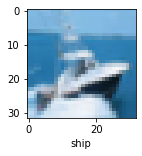

In [22]:
plot_sample(x_train,y_train,8)

In [23]:
x_train=x_train/255
x_test=x_test/255

In [25]:
from tensorflow.keras import Sequential
ann=Sequential([
                      layers.Flatten(input_shape=(32,32,3)),
                      layers.Dense(3000,activation='relu'),
                      layers.Dense(1000,activation='relu'),
                      layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
  13/1563 [..............................] - ETA: 1:41 - loss: 2.3404 - accuracy: 0.1257

KeyboardInterrupt: ignored

In [ ]:
ann.evaluate(x_test,y_test)

In [26]:
from tensorflow.keras import Sequential
cnn=Sequential([
                    #CN
                      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                      layers.MaxPooling2D(2,2),
                    #Dense
                      layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(10,activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [33]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6762 - accuracy: 0.3963
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2252 - accuracy: 0.5673
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0711 - accuracy: 0.6230
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9862 - accuracy: 0.6524
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9128 - accuracy: 0.6825
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8477 - accuracy: 0.7049
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8053 - accuracy: 0.7197
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7588 - accuracy: 0.7327
Epoch 9/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7133 - accuracy: 0.7514
Epoch 10/10
1563/1563 [==============================] - 38s 25m

In [34]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.1018 - accuracy: 0.6416


[1.101752519607544, 0.6416000127792358]

In [35]:
y_test=y_test.reshape(-1,)

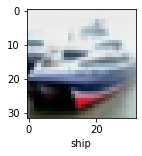

In [36]:
plot_sample(x_test,y_test,1)

In [38]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[9.5731921e-06, 1.8314196e-04, 9.3524592e-05, 6.0871434e-01,
        5.9514106e-05, 6.1557256e-02, 1.2125700e-03, 7.0400558e-05,
        3.0605438e-01, 2.2045342e-02],
       [8.4997120e-04, 1.2931672e-02, 2.2305566e-09, 1.5003398e-07,
        1.0634498e-07, 2.3005219e-07, 2.7419719e-10, 2.8617000e-09,
        9.8528743e-01, 9.3047589e-04],
       [1.1806189e-01, 4.6817306e-02, 1.4902392e-03, 1.4198556e-03,
        3.1565579e-03, 4.8720464e-04, 7.6492033e-06, 4.5338813e-03,
        6.7855722e-01, 1.4546812e-01],
       [3.3172488e-01, 2.9604675e-03, 1.8779403e-01, 8.5661374e-03,
        5.6658652e-02, 2.6121648e-05, 4.5313470e-02, 3.7080681e-04,
        3.6537027e-01, 1.2150916e-03],
       [1.7928764e-06, 3.8896967e-05, 1.1978537e-02, 5.1141307e-02,
        5.5889553e-01, 7.0265550e-03, 3.7085816e-01, 4.2457236e-06,
        8.5133124e-06, 4.6448651e-05]], dtype=float32)

In [41]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

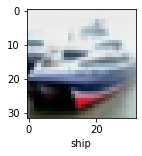

In [52]:
plot_sample(x_test,y_test,1)

In [53]:
classes[y_classes[1]]

'ship'